In [1]:
import optuna
print(optuna.__version__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

3.0.0


# 多目的最適化 TPESamplerを試す

In [2]:
def obj1(x1,x2):
    return (x1-1.)**2 + (x2-1.)**2

def obj2(x1,x2):
    return (x1+x2-10)**2

obj1とobj2を可視化する.

In [3]:
X1,X2 = np.meshgrid(np.linspace(0,10,10), np.linspace(0,10,10))

<a list of 10 text.Text objects>

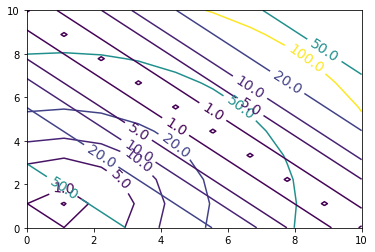

In [4]:
cont1 = plt.contour(X1,X2, obj1(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100])
cont1.clabel(fmt='%1.1f', fontsize=14)
cont2 = plt.contour(X1,X2, obj2(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100])
cont2.clabel(fmt='%1.1f', fontsize=14)

In [5]:
def objective(trial):
    x1 = trial.suggest_uniform("x1", 0, 10) # 変数xを上下限0~5の範囲で連続値
    x2 = trial.suggest_uniform("x2", 0, 10) # 変数yを上下限0~3の範囲で連続値
    return obj1(x1,x2), obj2(x1,x2)

In [6]:
study_nsga2 = optuna.create_study(directions=["minimize", "minimize"], sampler=optuna.samplers.NSGAIISampler())
study_nsga2.optimize(objective, n_trials=200)
study_tpe = optuna.create_study(directions=["minimize", "minimize"], sampler=optuna.samplers.TPESampler())
study_tpe.optimize(objective, n_trials=200)

[I 2022-08-31 10:02:53,077] A new study created in memory with name: no-name-e23b0904-46af-4d24-9a76-fe8d89ae6447
/var/folders/5y/dbgclc7j44b8481c5__rr_p40000gn/T/ipykernel_69031/798397316.py:2: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  x1 = trial.suggest_uniform("x1", 0, 10) # 変数xを上下限0~5の範囲で連続値
/var/folders/5y/dbgclc7j44b8481c5__rr_p40000gn/T/ipykernel_69031/798397316.py:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  x2 = trial.suggest_uniform("x2", 0, 10) # 変数yを上下限0~3の範囲で連続値
[I 2022-08-31 10:02:53,105] Trial 0 finished with values: [58.78275876846382, 5.939039897756108] and parameters: {'x1': 4.7493029899233505, 'x2': 7.687711556146515}. 
[I 

In [7]:
from optuna.study._multi_objective import _get_pareto_front_trials

In [8]:
pareto_trials_tpe = _get_pareto_front_trials(study_tpe)
pareto_trials_nsga2 = _get_pareto_front_trials(study_nsga2)

In [9]:
# pareto frontを取り出す.
pareto_list_nsga2 = []
for trial in pareto_trials_nsga2:
    pareto_list_nsga2.append({'params': trial.params, 'values': trial.values, 'trial_number': trial.number})

xs_pareto_nsga2 = []
vals_pareto_nsga2 = []
for lis in pareto_list_nsga2:
    xs_pareto_nsga2.append(lis['params'])
    vals_pareto_nsga2.append(lis['values'])
xs_pareto_nsga2 = pd.DataFrame(xs_pareto_nsga2)
vals_pareto_nsga2 = pd.DataFrame(vals_pareto_nsga2)


pareto_list_tpe = []
for trial in pareto_trials_tpe:
    pareto_list_tpe.append({'params': trial.params, 'values': trial.values, 'trial_number': trial.number})

xs_pareto_tpe = []
vals_pareto_tpe = []
for lis in pareto_list_tpe:
    xs_pareto_tpe.append(lis['params'])
    vals_pareto_tpe.append(lis['values'])
xs_pareto_tpe = pd.DataFrame(xs_pareto_tpe)
vals_pareto_tpe = pd.DataFrame(vals_pareto_tpe)

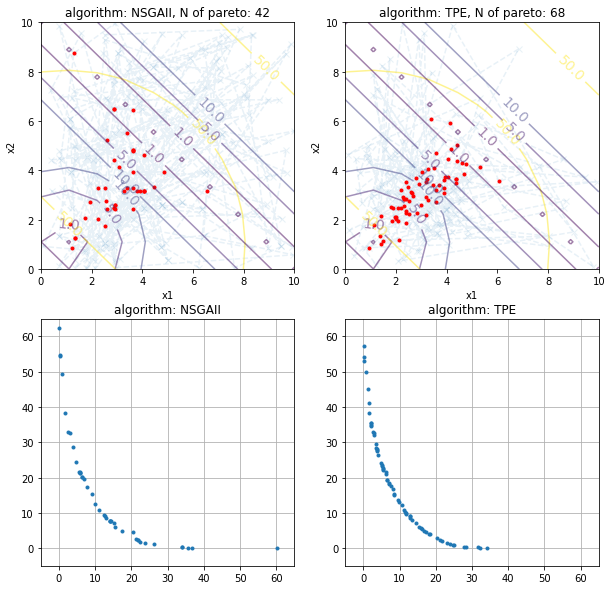

In [10]:
fig = plt.figure(figsize=[10,10])
# NSGAIIのx1,x2空間plot
ax = fig.add_subplot(221)
ax.set_title(f'algorithm: NSGAII, N of pareto: {len(xs_pareto_nsga2)}')
ax.plot(study_nsga2.trials_dataframe()['params_x1'], study_nsga2.trials_dataframe()['params_x2'],'x--', alpha=0.1)
ax.plot(xs_pareto_nsga2['x1'], xs_pareto_nsga2['x2'], '.', color='red')

cont1 = ax.contour(X1,X2, obj1(X1,X2), levels=[0.1, 1, 5, 10, 50], alpha=0.5)
cont1.clabel(fmt='%1.1f', fontsize=14)
cont2 = ax.contour(X1,X2, obj2(X1,X2), levels=[0.1, 1, 5, 10, 50], alpha=0.5)
cont2.clabel(fmt='%1.1f', fontsize=14)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

# TPEのx1,x2空間plot
ax = fig.add_subplot(222)
ax.set_title(f'algorithm: TPE, N of pareto: {len(xs_pareto_tpe)}')
ax.plot(study_tpe.trials_dataframe()['params_x1'], study_tpe.trials_dataframe()['params_x2'],'x--', alpha=0.1)
ax.plot(xs_pareto_tpe['x1'], xs_pareto_tpe['x2'], '.', color='red')

cont1 = ax.contour(X1,X2, obj1(X1,X2), levels=[0.1, 1, 5, 10, 50], alpha=0.5)
cont1.clabel(fmt='%1.1f', fontsize=14)
cont2 = ax.contour(X1,X2, obj2(X1,X2), levels=[0.1, 1, 5, 10, 50], alpha=0.5)
cont2.clabel(fmt='%1.1f', fontsize=14)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

# NSGAIIのobjective functions 空間plot
ax = fig.add_subplot(223)
ax.set_title(f'algorithm: NSGAII')
ax.plot(vals_pareto_nsga2[0], vals_pareto_nsga2[1], '.')
ax.set_xlim(-5,65)
ax.set_ylim(-5,65)
ax.grid()

ax = fig.add_subplot(224)
ax.set_title(f'algorithm: TPE')
ax.plot(vals_pareto_tpe[0], vals_pareto_tpe[1], '.')
ax.set_xlim(-5,65)
ax.set_ylim(-5,65)
ax.grid()

TPEの方が計算速度は劣るが、Pareto Front探索能力は上.

## 重要度分析周りのtest

In [11]:
import optuna.importance
import optuna.integration

In [12]:
fANOVA = optuna.importance.FanovaImportanceEvaluator()

In [13]:
print(fANOVA.evaluate(study_tpe, target=lambda t: t.values[0]))
print(fANOVA.evaluate(study_nsga2, target=lambda t: t.values[0]))

OrderedDict([('x1', 0.5038716896813304), ('x2', 0.49612831031866955)])
OrderedDict([('x1', 0.5127678635455802), ('x2', 0.4872321364544198)])


In [14]:
shap = optuna.integration.ShapleyImportanceEvaluator()

ShapleyImportanceEvaluator is experimental (supported from v3.0.0). The interface can change in the future.


In [15]:
print(shap.evaluate(study_tpe, target=lambda t: t.values[0]))
print(shap.evaluate(study_nsga2, target=lambda t: t.values[0]))

OrderedDict([('x1', 8.1066625946851), ('x2', 7.812430895325898)])
OrderedDict([('x2', 19.80574975416909), ('x1', 18.86448267279805)])


# 制約付き最適化を試す

In [46]:
def obj1(x1,x2):
    return (x1-1.)**2 + (x2-1.)**2

def obj2(x1,x2):
    return (x1+x2-10)**2

def constraints(trial):
    return trial.user_attrs['constraint']

def objective(trial):
    x1 = trial.suggest_uniform("x1", 0, 10) # 変数xを上下限0~5の範囲で連続値
    x2 = trial.suggest_uniform("x2", 0, 10) # 変数yを上下限0~3の範囲で連続値
    trial.set_user_attr('constraint', (obj2(x1,x2),))

    return obj1(x1,x2)

In [47]:
X1,X2 = np.meshgrid(np.linspace(0,10,10), np.linspace(0,10,10))

<a list of 10 text.Text objects>

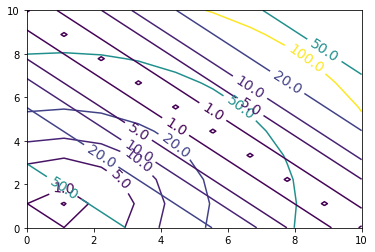

In [48]:
cont1 = plt.contour(X1,X2, obj1(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100])
cont1.clabel(fmt='%1.1f', fontsize=14)
cont2 = plt.contour(X1,X2, obj2(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100])
cont2.clabel(fmt='%1.1f', fontsize=14)

In [49]:
study_cons = optuna.create_study(directions=["minimize"], sampler=optuna.samplers.TPESampler(constraints_func=constraints))
study_cons.optimize(objective, n_trials=200)

[I 2022-08-31 10:16:40,270] A new study created in memory with name: no-name-b379ed4b-81c3-453e-8c80-44e2d8554887
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
[I 2022-08-31 10:16:40,280] Trial 0 finished with value: 7.55266288299474 and parameters: {'x1': 0.4236139280538742, 'x2': 3.6870880110374604}. Best is trial 0 with value: 7.55266288299474.
[I 2022-08-31 10:16:40,292] Trial 1 finished with value: 67.4535358844421 and parameters: {'x1': 9.03759550189368, 'x2': 2.68837034811104}. Best is trial 0 with value: 7.55266288299474.
[I 2022-08-31 10:16:40,296] Trial 2 finished with value: 99.19974521692521 and parameters: {'x1': 6.7956410658

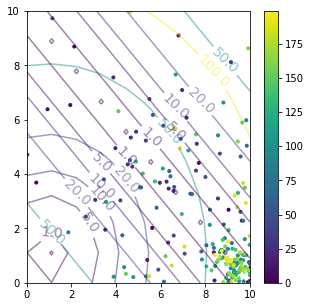

In [50]:
plt.figure(figsize=(5,5))
cont1 = plt.contour(X1,X2, obj1(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100], alpha=0.5)
cont1.clabel(fmt='%1.1f', fontsize=14)
cont2 = plt.contour(X1,X2, obj2(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100], alpha=0.5)
cont2.clabel(fmt='%1.1f', fontsize=14)

# plt.scatter(study_cons.trials_dataframe()['params_x1'], study_cons.trials_dataframe()['params_x2'], c=study_cons.trials_dataframe()['value'], marker='.')
plt.scatter(study_cons.trials_dataframe()['params_x1'], study_cons.trials_dataframe()['params_x2'], c=study_cons.trials_dataframe()['number'], marker='.')
plt.colorbar()

In [51]:
study_cons.trials_dataframe().sort_values('value')[study_cons.trials_dataframe().sort_values('value')['user_attrs_constraint']<(0.01,)]

,number,value,datetime_start,datetime_complete,duration,params_x1,params_x2,user_attrs_constraint,system_attrs_constraints,state
23,23,32.252841,2022-08-31 10:16:40.509698,2022-08-31 10:16:40.519999,0 days 00:00:00.010301,4.657842,5.344311,"(4.6327395788709344e-06,)","(4.6327395788709344e-06,)",COMPLETE
19,19,35.097671,2022-08-31 10:16:40.425287,2022-08-31 10:16:40.437877,0 days 00:00:00.012590,6.261336,3.723236,"(0.00023802166348264197,)","(0.00023802166348264197,)",COMPLETE
17,17,36.724435,2022-08-31 10:16:40.398963,2022-08-31 10:16:40.410099,0 days 00:00:00.011136,6.572953,3.380469,"(0.0021695565762510686,)","(0.0021695565762510686,)",COMPLETE
124,124,59.956216,2022-08-31 10:16:42.453752,2022-08-31 10:16:42.465630,0 days 00:00:00.011878,8.740277,1.210538,"(0.0024191318220585373,)","(0.0024191318220585373,)",COMPLETE
195,195,59.987807,2022-08-31 10:16:43.935765,2022-08-31 10:16:43.952544,0 days 00:00:00.016779,8.743260,1.172422,"(0.007109579142884933,)","(0.007109579142884933,)",COMPLETE
139,139,61.515998,2022-08-31 10:16:42.817116,2022-08-31 10:16:42.851682,0 days 00:00:00.034566,8.841981,1.139062,"(0.0003593795433070456,)","(0.0003593795433070456,)",COMPLETE
193,193,63.727640,2022-08-31 10:16:43.904366,2022-08-31 10:16:43.917952,0 days 00:00:00.013586,8.982610,0.925350,"(0.008471220901002855,)","(0.008471220901002855,)",COMPLETE
192,192,64.799575,2022-08-31 10:16:43.887666,2022-08-31 10:16:43.901761,0 days 00:00:00.014095,9.048516,0.855217,"(0.009267234518779076,)","(0.009267234518779076,)",COMPLETE
199,199,66.355197,2022-08-31 10:16:44.025126,2022-08-31 10:16:44.050134,0 days 00:00:00.025008,9.143013,0.784271,"(0.005287688314806265,)","(0.005287688314806265,)",COMPLETE
198,198,66.746053,2022-08-31 10:16:43.996553,2022-08-31 10:16:44.019951,0 days 00:00:00.023398,9.167977,0.826197,"(3.394601208463728e-05,)","(3.394601208463728e-05,)",COMPLETE


In [52]:
df_cons = study_cons.trials_dataframe().sort_values('value')#[study_cons.trials_dataframe().sort_values('value')['user_attrs_constraint'] < (1, )]

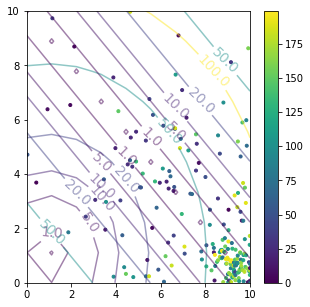

In [53]:
plt.figure(figsize=(5,5))
cont1 = plt.contour(X1,X2, obj1(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100], alpha=0.5)
cont1.clabel(fmt='%1.1f', fontsize=14)
cont2 = plt.contour(X1,X2, obj2(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100], alpha=0.5)
cont2.clabel(fmt='%1.1f', fontsize=14)

# plt.plot(df_cons['params_x1'], df_cons['params_x2'], marker='.')
plt.scatter(df_cons['params_x1'], df_cons['params_x2'], c=df_cons['number'], marker='.')
plt.colorbar()
# plt.colorbar()

## try and tell methodで制約付きが使えるか?

In [114]:
from optuna import create_study, create_trial
from optuna.distributions import (
    UniformDistribution,  # A uniform distribution in the linear domain.
    LogUniformDistribution,  # A uniform distribution in the log domain.
    DiscreteUniformDistribution,  # A discretized uniform distribution in the linear domain.
    IntUniformDistribution,  # A uniform distribution on integers.
    IntLogUniformDistribution,  # A uniform distribution on integers in the log domain.
    CategoricalDistribution,  # A categorical distribution.
)

def constraints(trial):
    return trial.user_attrs['constraints']

def suggest_next_samples(samples, n_next_samples=1, constraints=False):
    """_summary_
    Args:
        samples (List[dict]): _description_
        n_next_samples (int, optional): _description_. Defaults to 1.
    Returns:
        _type_: _description_
    Example:
    [
        {'objective_values': {'values_0': 20},
        'params': [{'key': 'p0', 'value': -4.0, 'opttype': 'uniform', 'search_min': -10, 'search_max': 10},
                   {'key': 'p1', 'value': -8.0, 'opttype': 'uniform', 'search_min': -10, 'search_max': 10}]
        },
        {'objective_values': {'values_0': 50},
        'params': [{'key': 'p0', 'value': -2.0, 'opttype': 'uniform', 'search_min': -10, 'search_max': 10},
                   {'key': 'p1', 'value': -8.0, 'opttype': 'uniform', 'search_min': -10, 'search_max': 10}]
        }
    ]
    """
    study, distributions = _regist_samples(samples, constraints)

    # calculate next trial params
    suggest_params_list = []
    for _ in range(n_next_samples):
        trial = study.ask(distributions)
        suggest_params_list.append(trial.params)

    return suggest_params_list

def _regist_samples(samples, constraints=False):
    init_sample = samples[0]
    n_objective_value = len(init_sample['objective_values'])
    n_param = len(init_sample['params'])
    distributions = _define_distributions(init_sample)
    sampler = optuna.samplers.TPESampler() if not constraints else optuna.samplers.TPESampler(constraints_func=constraints)
    study = create_study(directions=['minimize' for _ in range(n_objective_value)], sampler=sampler)
    for sample in samples:
        study.add_trial(
            create_trial(
                params=_convert_params_to_dict(sample['params'], n_param),
                distributions=distributions,
                values=_convert_objective_values_dicts_to_lists(sample['objective_values'], n_objective_value),
                user_attrs={'constraints': sample['constraints']},
                system_attrs={'constraints': sample['constraints']}
            )
        )
    return study, distributions

def _define_distributions(init_sample):
    distributions = {}
    for lis in init_sample['params']:
        if lis['opttype'] == 'uniform':
            """ ValueError : If low value is larger than high value."""
            distributions[lis['key']] = UniformDistribution(low=lis['search_min'], high=lis['search_max'])

        elif lis['opttype'] == 'loguniform':
            """ ValueError : If low value is larger than high value, or low value is smaller than or equal to 0."""
            distributions[lis['key']] = LogUniformDistribution(low=lis['search_min'], high=lis['search_max'])

        elif lis['opttype'] == 'discreteuniform':
            """ ValueError – If low value is larger than high value.  """
            distributions[lis['key']] = DiscreteUniformDistribution(low=lis['search_min'], high=lis['search_max'], q=lis['step'])

        elif lis['opttype'] == 'int':
            """ ValueError : If low value is larger than high value, or step value is smaller or equal to 0. """
            distributions[lis['key']] = IntUniformDistribution(low=lis['search_min'], high=lis['search_max'])

        elif lis['opttype'] == 'intloguniform':
            """ ValueError : If low value is larger than high value, or low value is smaller than 1."""
            distributions[lis['key']] = IntLogUniformDistribution(low=lis['search_min'], high=lis['search_max'])

        elif lis['opttype'] == 'categorical':
            """ ValueError : If choices do not contain any elements. """
            distributions[lis['key']] = CategoricalDistribution(choices=lis['search_keys'])

        else:
            raise ValueError(f"opttype:{lis['opttype']} is invalid distribution type. \n opttype must be one of the following. \n ['uniform', 'loguniform', 'discreteuniform', 'int', 'intloguniform', 'categorical']")

    return distributions


def _convert_objective_values_dicts_to_lists(values: dict[str, float], n_objective_value: int = None):
    """_summary_
    Args:
        values (dict[str, float]): {'values_2': v2, 'values_0': v0, 'values_1': v1}
        n_objective_value (int): Defaults to None.
    Returns:
        _type_: _description_
    """

    if n_objective_value is None:
        n_objective_value = len(values)

    # check_size
    if len(values) != n_objective_value:
        raise ValueError(f"The size of the objective_values is not uniform. Expected size:{n_objective_value}, but got {len(values)}")

    val = [values[f'values_{i}'] for i in range(n_objective_value)]
    return val


def _convert_params_to_dict(params, n_param=None):
    """_summary_
    Args:
        params (_type_): _description_
        n_params (_type_, optional): _description_. Defaults to None.
    Returns:
        _type_: _description_
    """
    if n_param is None:
        n_param = len(params)

    # check_size
    if len(params) != n_param:
        raise ValueError(f"The size of the params is not uniform. Expected size:{n_param}, but got {len(params)}")

    para_dict = {}
    for para in params:
        para_dict[para['key']] = para['value']
    return para_dict

In [137]:
x0 = 4
x1 = 5
values_0 = obj1(x0, x1)

init_sample = {}
init_sample['objective_values'] = {'values_0': values_0}
init_sample['params'] = [
    {'key':'p0', 'value':x0, 'opttype':'int', 'search_min':0, 'search_max':10},
    {'key':'p1', 'value':x1, 'opttype':'int', 'search_min':0, 'search_max':10}
]
init_sample['constraints'] = tuple([obj2(x0,x1)])

samples = [init_sample]

In [143]:
for i in range(200):
    next_sample = suggest_next_samples(samples, constraints=True)

    # levi関数へ問い合わせ.
    val = obj1(next_sample[0]['p0'], next_sample[0]['p1'])
    sample = {'objective_values':{'values_0': val},
              'params':[{'key':'p0', 'value':next_sample[0]['p0'], 'opttype':'int', 'search_min':0, 'search_max':10},
                        {'key':'p1', 'value':next_sample[0]['p1'], 'opttype':'int', 'search_min':0, 'search_max':10}
              ],
              'constraints':tuple([obj2(next_sample[0]['p0'], next_sample[0]['p1'])])
              }
    samples.append(sample)

IntUniformDistribution has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :class:`~optuna.distributions.IntDistribution` instead.
The ``constraints_func`` option is an experimental feature. The interface can change in the future.
[I 2022-09-01 12:07:28,101] A new study created in memory with name: no-name-ca416c68-59e5-4ca8-b05b-4bac19f01bc7
IntUniformDistribution(high=10, low=0, step=1) is deprecated and internally converted to IntDistribution(high=10, log=False, low=0, step=1). See https://github.com/optuna/optuna/issues/2941.
[I 2022-09-01 12:07:28,103] A new study created in memory with name: no-name-8c111dbb-dd2f-4689-ae2a-ffec44fc31cc
[I 2022-09-01 12:07:28,106] A new study created in memory with name: no-name-f2eb4106-2805-4a50-8e32-0ab5460708d0
[I 2022-09-01 12:07:28,110] A new study created in memory with name: no-name-eaee301f-62eb-4c36-97b2-278c1e0a87bc
[I 2022-09-01 12:07:28,115] A new study c

In [177]:
'constraint' in samples[0]

False

In [189]:
print(False != ('constraints' in samples[0]))
print(True != ('constraints' in samples[0]))
print(False != ('constraint' in samples[0]))
print(True != ('constraint' in samples[0]))

True
False
False
True


In [145]:
study ,_ = _regist_samples(samples)

IntUniformDistribution has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :class:`~optuna.distributions.IntDistribution` instead.
[I 2022-09-01 12:07:34,058] A new study created in memory with name: no-name-1ec0deb6-0fcc-403f-a050-c001081ed8ff


In [146]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_p0,params_p1,user_attrs_constraints,system_attrs_constraints,state
0,0,25.0,2022-09-01 12:07:34.059630,2022-09-01 12:07:34.059630,0 days,4,5,"(1,)","(1,)",COMPLETE
1,1,32.0,2022-09-01 12:07:34.059982,2022-09-01 12:07:34.059982,0 days,5,5,"(0,)","(0,)",COMPLETE
2,2,100.0,2022-09-01 12:07:34.060179,2022-09-01 12:07:34.060179,0 days,7,9,"(36,)","(36,)",COMPLETE
3,3,81.0,2022-09-01 12:07:34.060333,2022-09-01 12:07:34.060333,0 days,1,10,"(1,)","(1,)",COMPLETE
4,4,9.0,2022-09-01 12:07:34.060464,2022-09-01 12:07:34.060464,0 days,1,4,"(25,)","(25,)",COMPLETE
...,...,...,...,...,...,...,...,...,...,...
196,196,32.0,2022-09-01 12:07:34.089466,2022-09-01 12:07:34.089466,0 days,5,5,"(0,)","(0,)",COMPLETE
197,197,32.0,2022-09-01 12:07:34.089598,2022-09-01 12:07:34.089598,0 days,5,5,"(0,)","(0,)",COMPLETE
198,198,41.0,2022-09-01 12:07:34.089720,2022-09-01 12:07:34.089720,0 days,6,5,"(1,)","(1,)",COMPLETE
199,199,41.0,2022-09-01 12:07:34.089842,2022-09-01 12:07:34.089842,0 days,5,6,"(1,)","(1,)",COMPLETE


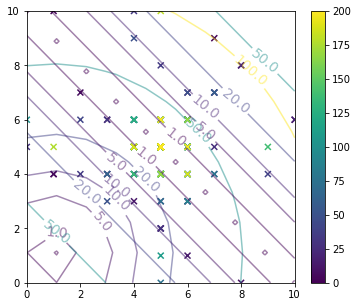

In [147]:
plt.figure(figsize=(6,5))
cont1 = plt.contour(X1,X2, obj1(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100], alpha=0.5)
cont1.clabel(fmt='%1.1f', fontsize=14)
cont2 = plt.contour(X1,X2, obj2(X1,X2), levels=[0.1, 1, 5, 10, 20, 50, 100], alpha=0.5)
cont2.clabel(fmt='%1.1f', fontsize=14)

plt.scatter(study.trials_dataframe()['params_p0'], study.trials_dataframe()['params_p1'], c=study.trials_dataframe()['number'], marker='x')
plt.colorbar()

In [72]:
study.trials_dataframe().sort_values('value')[study.trials_dataframe().sort_values('value')['user_attrs_constraint']< (0.01,)]

,number,value,datetime_start,datetime_complete,duration,params_p0,params_p1,user_attrs_constraint,system_attrs_constraints,state
163,163,32.0,2022-08-31 10:24:18.791214,2022-08-31 10:24:18.791214,0 days,5,5,"(0,)","(0,)",COMPLETE
164,164,32.0,2022-08-31 10:24:18.791468,2022-08-31 10:24:18.791468,0 days,5,5,"(0,)","(0,)",COMPLETE
165,165,32.0,2022-08-31 10:24:18.791643,2022-08-31 10:24:18.791643,0 days,5,5,"(0,)","(0,)",COMPLETE
114,114,32.0,2022-08-31 10:24:18.778777,2022-08-31 10:24:18.778777,0 days,5,5,"(0,)","(0,)",COMPLETE
113,113,32.0,2022-08-31 10:24:18.778342,2022-08-31 10:24:18.778342,0 days,5,5,"(0,)","(0,)",COMPLETE
...,...,...,...,...,...,...,...,...,...,...
63,63,40.0,2022-08-31 10:24:18.764334,2022-08-31 10:24:18.764334,0 days,3,7,"(0,)","(0,)",COMPLETE
53,53,40.0,2022-08-31 10:24:18.759916,2022-08-31 10:24:18.759916,0 days,3,7,"(0,)","(0,)",COMPLETE
13,13,40.0,2022-08-31 10:24:18.749261,2022-08-31 10:24:18.749261,0 days,3,7,"(0,)","(0,)",COMPLETE
11,11,40.0,2022-08-31 10:24:18.748346,2022-08-31 10:24:18.748346,0 days,3,7,"(0,)","(0,)",COMPLETE
